# Movie data preprocessing
## movies와 credits에서 프로젝트에 사용되지 않는 컬럼을 버린다
### budget, homepage, original_language, original_title, production_countries, release_date, revenue, spoken_language, status

## movies와 credits dataframe을 merge한다.
## crew 컬럼에서 director 정보를 뽑아내서 새로운 DataFrame으로 만든다.
### director1 ~ director 종류수

In [1]:
import pandas as pd
import numpy as np

movies_df = pd.read_csv("data/tmdb_5000_movies.csv")
credits_df = pd.read_csv("data/tmdb_5000_credits.csv")

# drop columns
# budget, homepage, original_language, original_title, production_countries, release_date,
# revenue, spoken_languages, status
movies_df = movies_df.drop(columns=['budget', 'homepage', 'original_language', 'original_title', 'production_countries',
                                    'release_date', 'revenue', 'spoken_languages', 'status', 'runtime', 'tagline'])

credits_df = credits_df.drop(columns=['title'])
credits_df.columns=['id', 'cast', 'crew']

In [2]:
# check if 'id' can be used as identifier
id_list_1 = list()
for item in credits_df['id']:
    if type(item) is not int:
        print('Wrong Id data type')
    id_list_1.append(item)
print(len(id_list_1))

for item in movies_df['id']:
    if item not in id_list_1:
        print('Id is not sufficient : ', item)

4803


# total_df = movies_df + credits_df

In [3]:
total_df = movies_df.join(credits_df.set_index('id'), on='id')
total_df.head(1)

,genres,id,keywords,overview,popularity,production_companies,title,vote_average,vote_count,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


# total_df 에서 중복으로 등장하는 row들을 drop한다.

In [4]:
#total_df = total_df.drop_duplicates(['title'], keep='first')
total_df = total_df.drop_duplicates(['title'], keep='first')
total_df = pd.DataFrame(total_df.values, columns=['genres', 'id', 'keywords', 'overview', 'popularity', 'production_companies', 'title', 'vote_average', 'vote_count', 'cast', 'crew'])
#k.drop_duplicates(subset=['A'], keep=False)

# string 형태로 되어있는 각 value를 python dictionary 형태로 가져온다.

In [5]:
import json

json_columns = ['genres', 'keywords', 'cast', 'crew', 'production_companies']
for column in json_columns:
    total_df[column] = total_df[column].apply(json.loads)

# Dataset내의 영화중 crew 데이터를 갖고 있지 않은 영화의 목록을 출력

In [6]:
count=0
for title, crew_list in zip(total_df['title'], total_df["crew"]):
    if not crew_list:
        print(title)
        count+=1
print(count)

Flying By
Running Forever
Boynton Beach Club
Sharkskin
The Book of Mormon Movie, Volume 1: The Journey
Hum To Mohabbat Karega
Roadside Romeo
Me You and Five Bucks
Down & Out With The Dolls
Crowsnest
Sex With Strangers
The Helix... Loaded
Karachi se Lahore
Harrison Montgomery
Light from the Darkroom
America Is Still the Place
The Little Ponderosa Zoo
Diamond Ruff
Rise of the Entrepreneur: The Search for a Better Way
I Want Your Money
Fabled
Death Calls
Amidst the Devil's Wings
Teeth and Blood
UnDivided
Little Big Top
Short Cut to Nirvana: Kumbh Mela
The Blood of My Brother: A Story of Death in Iraq
28


# Data vectorization (one-hot encoding)
# 영화의 feature 값을 1d array로 변환
##  Data -> list, set, dict -> list

In [7]:
director_list = list()
director_set = set()
for title, crew_list in zip(total_df['title'], total_df['crew']):
    temp = list()
    for one_crew_dict in crew_list:
        if one_crew_dict['job'] == 'Director':
            temp.append(one_crew_dict['name'])
            director_set.add(one_crew_dict['name'])
    director_list.append(temp)


In [8]:
director_dict = dict()
director_dict = dict.fromkeys(director_set)
count = 0
for key in director_dict.keys():
    director_dict[key] = count
    count+=1
director_rev_dict = {v:k for k,v in director_dict.items()}
print(len(director_dict.keys()))

2575


In [9]:
director_vector = list()
director_columns_name = list()

# Director vectorize - one hot encoding
for directors in director_list:
    temp_director = [0]*len(director_dict.keys())
    for director in directors:
        temp_director[director_dict[director]] = 1
    director_vector.append(temp_director)

# Generate column names of Director dataframe
for count in range(len(director_dict.keys())):
    director_columns_name.append('Director' + str(count))
    
print(len(director_vector))
Directors = pd.DataFrame(director_vector, columns=director_columns_name)

4800


# Production Companies vectorize
## production company 의 종류 개수 : 5017
## 한 영화가 가진 가장 많은 production company의 종류 개수 : 26
## 한 영화가 가진 가장 적은 production company의 종류 개수 : 0

In [10]:
pro_com_set = set()
com_list_list = list()
for company_list in total_df['production_companies']:
    temp_com_list = list()
    for company in company_list:
        pro_com_set.add(company['name'])
        temp_com_list.append(company['name'])
    com_list_list.append(temp_com_list)

pro_com_vectors = list()
pro_com_dict = dict()
pro_com_dict = dict.fromkeys(pro_com_set)
count = 0
for keyitem in pro_com_dict.keys():
    pro_com_dict[keyitem] = count
    count += 1

for com_list in com_list_list:
    temp_vec = [0]*5017
    for com in com_list:
        temp_vec[pro_com_dict[com]] = 1
    pro_com_vectors.append(temp_vec)

production_com_columns = list()
for i in range(5017):
    temp_name = 'company' + str(i)
    production_com_columns.append(temp_name)

Production_Companies = pd.DataFrame(pro_com_vectors, columns = production_com_columns)
#Production_Companies['title'] = total_df['title']

In [11]:
# 한 영화가 가진 가장 많은 production company의 종류 개수 : 26
max_len = 0
for com_list in com_list_list:
    if len(com_list) > max_len:
        max_len = len(com_list)
print(max_len)

26


In [12]:
# 한 영화가 가진 가장 적은 production company의 종류 개수 : 0
min_len = 9999
for com_list in com_list_list:
    if len(com_list) < min_len:
        min_len = len(com_list)
print(min_len)

0


# Genre vectorize
## genre 의 종류 개수 : 20
## 한 영화가 가진 가장 많은 genre의 종류 개수 : 7
## 한 영화가 가진 가장 적은 genre의 종류 개수 : 0

In [13]:
genre_set = set()
genre_list_list = list()

for genre_list in total_df['genres']:
    temp_genre = list()
    for genre in genre_list:
        genre_set.add(genre['name'])
        temp_genre.append(genre['name'])
    genre_list_list.append(temp_genre)
print(len(genre_set))
print(genre_set)

20
{'History', 'Western', 'Music', 'Thriller', 'Mystery', 'Drama', 'War', 'Horror', 'TV Movie', 'Adventure', 'Family', 'Crime', 'Action', 'Documentary', 'Foreign', 'Romance', 'Science Fiction', 'Animation', 'Fantasy', 'Comedy'}


In [14]:
genre_dict = dict()
genre_dict = dict.fromkeys(genre_set)
count = 0
for key_item in genre_dict.keys():
    genre_dict[key_item] = count
    count += 1
genre_vector = list()
for genre_list in genre_list_list:
    temp_genre_vec = [0] * 20
    for genre in genre_list:
        temp_genre_vec[genre_dict[genre]] = 1
    genre_vector.append(temp_genre_vec)
genre_cols = list()
for i in range(20):
    temp_genre = 'genre' + str(i)
    genre_cols.append(temp_genre)

Genre = pd.DataFrame(genre_vector, columns=genre_cols)

In [15]:
Genre.head(10)

,genre0,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,genre11,genre12,genre13,genre14,genre15,genre16,genre17,genre18,genre19
0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [16]:
# 한 영화가 가진 가장 많은 genre의 종류 개수 : 7
max_len = 0
for genre_list in genre_list_list:
    if len(genre_list) > max_len:
        max_len = len(genre_list)
print(max_len)

7


In [17]:
# 한 영화가 가진 가장 적은 genre의 종류 개수 : 0
min_len = 9999
for genre_list in genre_list_list:
    if len(genre_list) < min_len:
        min_len = len(genre_list)
print(min_len)

0


# TODO : 왜 keyword에 one hot encoding을 적용하였는가

In [18]:
import re
import string

keywords=total_df['keywords']

cntOf2=0  #counter for movies that have more than 2 keywords 
cntOf1=0  #counter for movies that have 1 keyword 
cntOf0=0  #counter for movies that have no keyward 

keyDf = pd.DataFrame(columns=("key1", "key2"))
 # save first two keywords 
for i in range(len(keywords)):
    if len(keywords[i]) >= 2:
        cntOf2+=1
        #print("There're 2 keywords")
        m1=keywords[i][0]['name']
        m2=keywords[i][1]['name']
    elif len(keywords[i]) == 1:
        cntOf1+=1
        #print("There's 1 keyword")
        m1=keywords[i][0]['name']
        m2="null"
    else :
        cntOf0+=1
        #print("there's no keyword")
        m1="null"
        m2="null"
    keyDf.loc[i]=[m1,m2]

print(cntOf2)
print(cntOf1)
print(cntOf0)

4100
288
412


In [19]:
def vectorize(value_set, list_list, col_name):
    feature_vector = list()
    feature_dict = dict.fromkeys(value_set)
    feature_columns = list()
    count = 0
    
    for key in feature_dict.keys():
        feature_dict[key] = count
        count+=1
    for one_line in list_list:
        temp_list = [0]*len(value_set)
        for one_ele in one_line:
            temp_list[feature_dict[one_ele]] = 1
        feature_vector.append(temp_list)
    for i in range(len(value_set)):
        temp_name = str(col_name) + str(i)
        feature_columns.append(temp_name)
        
    result = pd.DataFrame(feature_vector, columns = feature_columns)
    return result

In [20]:
keywords_list_list = list()
keywords_set = set()

for keywords_list in keywords:
    temp_list = list()
    for keyword in keywords_list:
        temp_list.append(keyword['name'])
        keywords_set.add(keyword['name'])
    keywords_list_list.append(temp_list)
    
Keywords = vectorize(keywords_set, keywords_list_list, 'keyword')
Keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Columns: 9809 entries, keyword0 to keyword9808
dtypes: int64(9809)
memory usage: 359.2 MB


# Overview vectorize - tf-idf를 사용.
# sparse matrix를 기반으로 cosine similarity를 계산
## CountVectorizer 가 아닌 TF-IDF Vectorizer를 사용하는 이유
### 1. CountVectorizer는 단어의 빈도수에 따라 값이 단순히 증가
### 2. TF-IDF Vectorizer (Term Frequency, Inverse Document Frequency)
### -> 단어의 빈도수에 비례하여 값이 증가한다. 하지만 Corpus 내에서 단어가 나타나는 빈도수로 결과값을 나누어 줌으로써 The 와 같이 작은 뜻을 내포하지만 높은 빈도수로 인해 큰 가중치를 갖는 단어의 가중치를 줄여주는 역할을 한다.

### -> 문서 세트에서 자주 발생하는 용어의 가중치를 줄이고 드물게 발생하는 용어의 가중치를 증가시키는 역 문서 빈도 요소가 결과에 통합된다.

### -> 이를 통해 단어의 발생 빈도수와 관계없이 문서간의 연관관계를 파악하는 것에 집중할 수 있게 된다.
1. sci-kit learn의 TfidfVectorizer 모듈을 사용하여 row : movie, column : 단어의 빈도수인 행렬을 만든다. 

2. sci-kit learn의 cosine_similarities()보다 속도면에서 우수한 linear_kernel()을 사용하여 cosine similarity score를 계산

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english')

total_df['overview'] = total_df['overview'].fillna('')

# construct TF-IDF matrix by fitting and transforming the overview data
tfidf_matrix = tfidf.fit_transform(total_df['overview'])

# output the shape of tfidf_matrix
tfidf_matrix.shape

(4800, 20967)

In [22]:
import scipy
# overview 학습의 결과를 unpack 해보았다.
M1 = scipy.sparse.diags(tfidf_matrix.A.ravel()).tocsr()
M1

<100641600x100641600 sparse matrix of type '<class 'numpy.float64'>'
	with 125704 stored elements in Compressed Sparse Row format>

# 하나의 feature에 대해서만 score를 얻어 영화를 추천해주는 함수
## -> get_recommendations(title, 추천받고자 원하는 영화의 개수, 코사인 유사도 공식)

In [23]:
from sklearn.metrics.pairwise import linear_kernel

cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(total_df.index, index=total_df['title']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, target_count=10, cosine_sim=cosine_similarity):
    result_dict = dict()
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x : x[1], reverse = True)
    sim_scores = sim_scores[1:1 + target_count] # except for itself
    movies_indices = [i[0] for i in sim_scores]
    for index, score in zip(movies_indices, sim_scores):
        print("index:", score[0],"  ","score:", score[1], "   ", total_df['title'].iloc[index])
    #return total_df['title'].iloc[movies_indices]

In [24]:
cast_all = dict()
for cast_group in total_df['cast']:
    for cast in cast_group:
        if cast['id'] in cast_all:
            cast_all[cast['id']][1] += 1
        else:
            cast_all[cast['id']] = [cast['name'], 1]

In [25]:
len(cast_all)

54557

In [26]:
cast_freq = list(cast_all.values())
cast_freq.sort(reverse=True, key=lambda x: (x[1]))

In [27]:
cast2vec_dict = dict()
count = 0;
for cast_id in cast_all.keys():
    cast2vec_dict[cast_id] = count
    count += 1

cast_vectors = list()
for cast_group in total_df['cast']:
    cast_vector = [0] * len(cast_all)
    for cast in cast_group:
        cast_vector[cast2vec_dict[cast['id']]] = 1
    cast_vectors.append(cast_vector)

In [28]:
len(cast_vectors[0])

54557

In [29]:
cast_col = list()
count = 0
for ele in cast_vectors[0]:
    name = 'cast' + str(count)
    count += 1
    cast_col.append(name)

In [30]:
Cast = pd.DataFrame(cast_vectors, columns=cast_col)

In [31]:
Cast.shape

(4800, 54557)

# Director, Genre, Production Companies, Cast 벡터화 완료
## 각 벡터화의 결과를 DataFrame 형태로 저장함
## 각 DataFrame의 shape를 확인

In [32]:
print('-'*62)
print("-"*20 + "Vectorization Complete" + "-"*20)
print("Director shape : ", Directors.shape)
print("Genre shape", Genre.shape)
print("Production Companies shape : ", Production_Companies.shape)
print("Cast shape : ", Cast.shape)
print("Keyword shape : ", Keywords.shape)
print('-'*62)

--------------------------------------------------------------
--------------------Vectorization Complete--------------------
Director shape :  (4800, 2575)
Genre shape (4800, 20)
Production Companies shape :  (4800, 5017)
Cast shape :  (4800, 54557)
Keyword shape :  (4800, 9809)
--------------------------------------------------------------


# cosine similarity 를 구하기 위해 numpy array 를 sparse matrix으로 변환

In [33]:
from scipy import sparse

Directors_sparse = sparse.csr_matrix(Directors.values)
Genre_sparse = sparse.csr_matrix(Genre.values)
Procom_sparse = sparse.csr_matrix(Production_Companies.values)
Cast_sparse = sparse.csr_matrix(Cast.values)

# 영화의 수가 4800여개뿐이므로 감독 데이터만으로는 상위 10개의 유사도를 갖는 영화들의 목록을 정확히 얻을 수 없다는 것을 알 수 있다.

In [34]:
cosine_sim_directors = linear_kernel(Directors_sparse, Directors_sparse)
get_recommendations('The Dark Knight Rises',10, cosine_sim_directors)

index: 65    score: 1.0     The Dark Knight
index: 95    score: 1.0     Interstellar
index: 96    score: 1.0     Inception
index: 119    score: 1.0     Batman Begins
index: 1033    score: 1.0     Insomnia
index: 1196    score: 1.0     The Prestige
index: 3572    score: 1.0     Memento
index: 0    score: 0.0     Avatar
index: 1    score: 0.0     Pirates of the Caribbean: At World's End
index: 2    score: 0.0     Spectre


In [35]:
cosine_sim_genre = linear_kernel(Genre_sparse, Genre_sparse)
get_recommendations('The Dark Knight Rises',10, cosine_sim_genre)

index: 65    score: 4.0     The Dark Knight
index: 405    score: 4.0     The Fast and the Furious: Tokyo Drift
index: 590    score: 4.0     The Siege
index: 629    score: 4.0     Need for Speed
index: 724    score: 4.0     Man on Fire
index: 741    score: 4.0     Shooter
index: 747    score: 4.0     Gangster Squad
index: 761    score: 4.0     Righteous Kill
index: 762    score: 4.0     Mercury Rising
index: 767    score: 4.0     xXx: State of the Union


In [36]:
cosine_sim_procom = linear_kernel(Procom_sparse, Procom_sparse)
get_recommendations('The Dark Knight Rises',10, cosine_sim_procom)

index: 14    score: 4.0     Man of Steel
index: 65    score: 4.0     The Dark Knight
index: 119    score: 4.0     Batman Begins
index: 95    score: 3.0     Interstellar
index: 96    score: 3.0     Inception
index: 9    score: 2.0     Batman v Superman: Dawn of Justice
index: 10    score: 2.0     Superman Returns
index: 41    score: 2.0     Green Lantern
index: 48    score: 2.0     Jack the Giant Slayer
index: 51    score: 2.0     Pacific Rim


In [37]:
cosine_sim_cast = linear_kernel(Cast_sparse, Cast_sparse)
get_recommendations('The Dark Knight Rises',10, cosine_sim_cast)

index: 65    score: 7.0     The Dark Knight
index: 96    score: 7.0     Inception
index: 119    score: 7.0     Batman Begins
index: 298    score: 7.0     The Wolf of Wall Street
index: 95    score: 6.0     Interstellar
index: 2060    score: 6.0     Out of the Furnace
index: 1424    score: 5.0     Concussion
index: 16    score: 4.0     The Avengers
index: 1196    score: 4.0     The Prestige
index: 27    score: 3.0     Battleship


In [38]:
def get_cast_by_index(idx):
    cast = total_df.values[idx][9]
    return [actor_data['name'] for actor_data in cast]
def get_cast_by_title(title):
    return get_cast_by_index(indices[title])

In [39]:
def total_recommendation_v1(title, target_count=10):
    idx = indices[title]
    # overview score
    cos_sim_overview = linear_kernel(tfidf_matrix, tfidf_matrix)
    sim_scores_overview = list(enumerate(cos_sim_overview[idx]))
    #sim_scores_overview = list(map(lambda x[1]:x[1]*10000, sim_scores_overview))
    
    # Director score
    cos_sim_director = linear_kernel(Directors_sparse, Directors_sparse)
    sim_scores_director = list(enumerate(cos_sim_director[idx]))
    
    # Production Companies score
    cos_sim_procom = linear_kernel(Procom_sparse, Procom_sparse)
    sim_scores_procom = list(enumerate(cos_sim_procom[idx]))
    
    # Genre score
    cos_sim_genre = linear_kernel(Genre_sparse, Genre_sparse)
    sim_scores_genre = list(enumerate(cos_sim_genre[idx]))
    
    # Cast socre
    cos_sim_cast = linear_kernel(Cast_sparse, Cast_sparse)
    sim_scores_cast = list(enumerate(cos_sim_cast[idx]))
    
    #total_scores = [sum(x[0]) for x in zip(sim_scores_overview, sim_scores_director, sim_scores_procom, sim_scores_genre, sim_scores_cast)]
    
    
    """
    sim_scores_overview = sorted(sim_scores_overview, key=lambda x : x[1], reverse = True)
    sim_scores_overview = sim_scores_overview[1:1 + target_count] # except for itself
    """
    total_scores = list()
    for x in zip(sim_scores_overview, sim_scores_director, sim_scores_procom, sim_scores_genre, sim_scores_cast):
        total_score = 0
        for idx, score in enumerate(x):
            if idx == 0:
                total_score += 1*score[1]
            total_score += score[1]
        total_scores.append(total_score)
        
    total_result = sorted(enumerate(total_scores), key=lambda x : x[1], reverse = True)
    total_result = total_result[1:1+target_count]
    movies_indicies = [i[0] for i in total_result]
    
    recommendation_result = list()
    
    for title, ind, score in  zip(total_df['title'].iloc[movies_indicies], movies_indicies, total_result):
        recommendation_result.append([ind, score[1], title])
    
    return recommendation_result

    """
    movies_indices = [i[0] for i in sim_scores]
    for index, score in zip(movies_indices, sim_scores):
        print("index:", score[0],"  ","score:", score[1], "   ", total_df['title'].iloc[index])
    #return total_df['title'].iloc[movies_indices]
    """

In [40]:
total_recommendation_v1("The Dark Knight Rises")

[[65, 16.602688023842877, 'The Dark Knight'],
 [119, 15.336000282774897, 'Batman Begins'],
 [96, 13.0, 'Inception'],
 [95, 11.0, 'Interstellar'],
 [1196, 9.032787561118191, 'The Prestige'],
 [298, 9.01214827720794, 'The Wolf of Wall Street'],
 [2060, 9.0, 'Out of the Furnace'],
 [747, 8.016990196843604, 'Gangster Squad'],
 [351, 6.04999226194579, 'The Departed'],
 [1254, 6.019959256164001, 'Get Carter']]

In [41]:
from scipy import spatial
import math

def Similarity(movie_title1, movie_title2, Feature):
    movie1_row = Feature.iloc[indices[movie_title1]]
    movie2_row = Feature.iloc[indices[movie_title2]]
    
    Dist = spatial.distance.cosine(movie1_row, movie2_row)
    if math.isnan(Dist):
        #print('nan!')
        Dist = 1.0
    return 1 - Dist

In [42]:
Similarity("The Avengers", "Thor", Genre)

0.6666666666666667

In [43]:
def get_overview_score(movie_title1, movie_title2):
    score = 0
    idx_1 = indices[movie_title1]
    idx_2 = indices[movie_title2]
    score = cosine_similarity[idx_1][idx_2]
    return score

In [44]:
get_overview_score("The Avengers", "Batman")

0.0584644599388013

# 두 영화간의 cosine distance를 1에서 뺀 결과를 점수로 반환한다.

In [45]:
def total_reccommendation_v2_cosDist(movie_title1, movie_title2):
    genre_score = Similarity(movie_title1, movie_title2, Genre)
    cast_score = Similarity(movie_title1, movie_title2, Cast)
    director_score = Similarity(movie_title1, movie_title2, Directors)
    pro_com_score = Similarity(movie_title1, movie_title2, Production_Companies)
    overview_score = get_overview_score(movie_title1, movie_title2)
    keywords_score = Similarity(movie_title1, movie_title2, Keywords)
    #total_score = genre_score + cast_score + director_score + pro_com_score + (10*overview_score) + (5*keywords_score)
    """
    print('-'*60)
    print('Genre : ', genre_score)
    print('Cast : ', cast_score)
    print('Director : ', director_score)
    print('Production Companies : ', pro_com_score)
    print('Overview : ', overview_score)
    print('Keywords : ', keywords_score)
    """
    return genre_score, cast_score, director_score, pro_com_score, overview_score, keywords_score

In [46]:
total_reccommendation_v2_cosDist("Iron Man", "Iron Man 3")

(1.0, 0.0725515215453656, 0.0, 1.0, 0.15088869151876816, 0.5773502691896257)

In [47]:
total_reccommendation_v2_cosDist("Batman", "Batman")

(1.0, 1.0, 1.0, 1.0, 1.0000000000000002, 1.0)

In [48]:
def get_score_lists_of_movies(target_movie_title):   
    
    total_genre = list()
    total_director = list()
    total_overview = list()
    total_keywords = list()
    total_cast = list()
    total_procom = list()
    
    for title in total_df.title:
        #score_list.append(total_reccommendation_v2_cosDist(target_movie_title, title))
        a,b,c,d,e,f = total_reccommendation_v2_cosDist(target_movie_title, title)
        total_genre.append(a)
        total_cast.append(b)
        total_director.append(c)
        total_procom.append(d)
        total_overview.append(e)
        total_keywords.append(f)
    
    return [total_genre, total_director, total_overview, total_keywords, total_cast, total_procom]

In [49]:
def regularize(one_dim_list):
    mean = np.mean(one_dim_list, axis=0)
    std = np.std(one_dim_list, axis=0)
    result = list()
    for item in one_dim_list:
        result.append((item-mean)/std)
    return result

In [50]:
final_genre = list()
final_director = list()
final_overview = list()
final_keywords = list()
final_cast = list()
final_procom = list()

def total_recommendation_v2(movie_title, target_count):
    score_lists = get_score_lists_of_movies(movie_title)
    score_dict = dict()
    global final_genre
    global final_director
    global final_overview
    global final_keywords
    global final_cast
    global final_procom
    
    regularized_genre_score = regularize(score_lists[0])
    final_genre = regularized_genre_score
    regularized_director_score = regularize(score_lists[1])
    final_director = regularized_director_score
    regularized_overview_score = regularize(score_lists[2])
    final_overview = regularized_overview_score
    regularized_keywords_score = regularize(score_lists[3])
    final_keywords = regularized_keywords_score
    regularized_cast_score = regularize(score_lists[4])
    final_cast = regularized_cast_score
    regularized_procom_score = regularize(score_lists[5])
    final_procom = regularized_procom_score
    
    for idx, title in enumerate(list(total_df.title)):
        score_dict[title] = regularized_genre_score[idx] + regularized_director_score[idx]\
        + regularized_overview_score[idx] + regularized_keywords_score[idx]\
        + regularized_cast_score[idx] + regularized_procom_score[idx]
    
    sorted_score = sorted(score_dict.items(), key=lambda kv: kv[1], reverse = True)
    return sorted_score[1:1 + target_count]

In [51]:
%time recom_result = total_recommendation_v2("The Dark Knight Rises", 10)

C:\Users\PSY\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Wall time: 48.3 s


In [52]:
recom_result

[('The Dark Knight', 71.55147746329834),
 ('Batman Begins', 57.9177368459057),
 ('Inception', 40.60771938933414),
 ('Interstellar', 37.7654367218226),
 ('The Prestige', 35.10663272717294),
 ('Batman Returns', 26.721486442313974),
 ('Batman', 26.457847203899608),
 ('Memento', 26.41815159788882),
 ('Insomnia', 24.457728187307247),
 ('Batman Forever', 23.84279634121949)]

In [53]:
def regularized_similarity_score(movie_title2):
    idx = indices[movie_title2]
    print('-'*60)
    print('Genre : ', final_genre[idx])
    print('Cast : ', final_cast[idx])
    print('Director : ', final_director[idx])
    print('Production Companies : ', final_procom[idx])
    print('Overview : ', final_overview[idx])
    print('Keywords : ', final_keywords[idx])
    

In [54]:
regularized_similarity_score("Memento")

------------------------------------------------------------
Genre :  0.028017250161008717
Cast :  2.6739308206910217
Director :  24.474476501040833
Production Companies :  -0.25411505650857097
Overview :  -0.3493247674311281
Keywords :  -0.15483315006434725


# Visualization - regularization

In [60]:
import matplotlib.pyplot as plt

def visualization(column_name):
    movie_title1="Avatar"
    titleDf=total_df['title']
    rtn_score=list()
    reg_score=list()
    rtn_index=list(range(100))
 
    for i in range(100):
        rtn_score.append(Similarity(movie_title1,titleDf[i], column_name))
        #print(rtn_score[movie_title])
    plt.scatter(rtn_index,rtn_score, s=0.5)
    plt.show()
    reg_score=regularize(rtn_score)
    plt.scatter(rtn_index,reg_score, s=0.5)
    plt.show()
    #return rtn_score, reg_score

def visualization_overview():
    movie_title1="Avatar"
    titleDf=total_df['title']
    rtn_score=list()
    rtn_index=list(range(100))
 
    for i in range(100):
        rtn_score.append(get_overview_score(movie_title1,titleDf[i]))
        #print(rtn_score[movie_title])
    plt.scatter(rtn_index,rtn_score, s=0.5)
    plt.show()
    reg_score=regularize(rtn_score)
    plt.scatter(rtn_index,reg_score, s=0.5)
    plt.show()
    #return rtn_score, reg_score

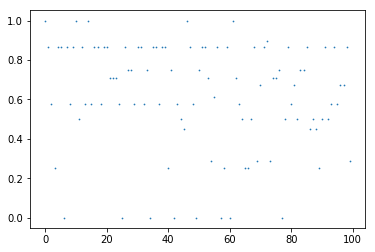

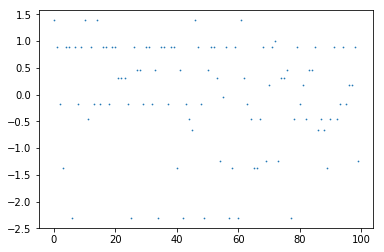

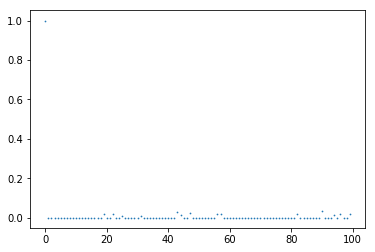

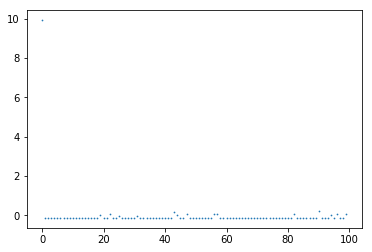

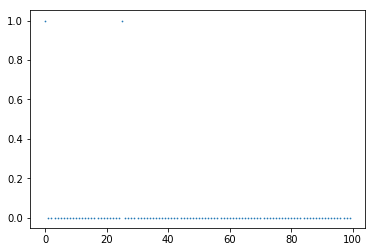

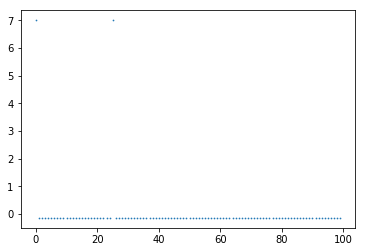

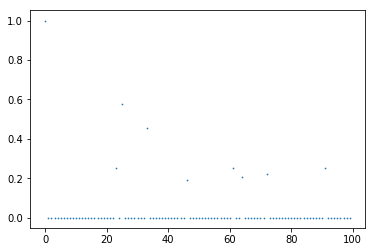

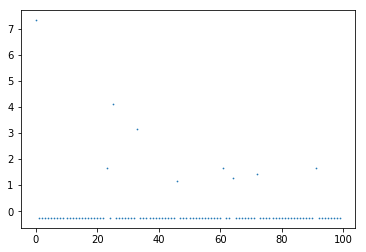

C:\Users\PSY\Anaconda3\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


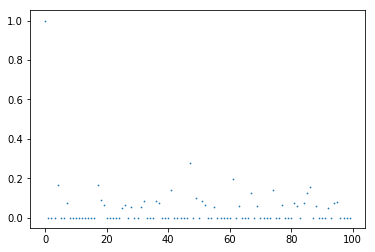

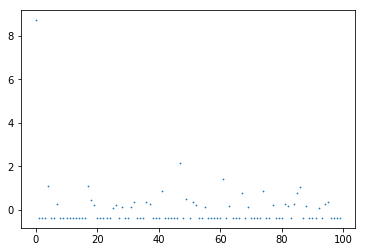

In [61]:
visualization(Genre)
visualization(Cast)
visualization(Directors)
visualization(Production_Companies)
visualization(Keywords)

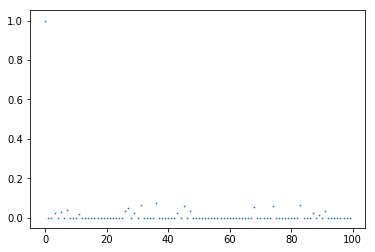

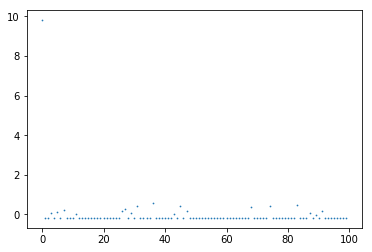

In [62]:
visualization_overview()